# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**


> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**

D'après le cours Probabilités IV on a : $\mathbb{P}_{Z_1,...,Z_N} = \mathbb{P}_{Z_1,..., Z_i | Z_{i+1},...,Z_{N} = z_1,...,z_n}\mathbb{P}_{Z_{i+1},...,Z_{N} = z_1,...,z_n}$ Dans le cadre où on est sûr des profondeurs des observations $z_1,...,z_n$ on pobtient alors $\mathbb{P}_{Z_1,...,Z_N} = \mathbb{P}_{Z_1,..., Z_i | Z_{i+1},...,Z_{N} = z_1,...,z_n}$

> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{-u²} $

> **4. En déduire un algorithme de simulation conditionnelle.**

In [253]:
# chargement dee dépendances 

import numpy as np 
import math
import matplotlib.pyplot as plt 
import random

In [254]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50 
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


In [255]:
mu_vect = [mu for i in range(N)]

In [256]:
def C(h, a, sig_2):
    return (np.exp(-abs(h)/a)*sig_2)



In [257]:
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

In [258]:
covar = C(mat_distance(discretization), a, sigma2)

In [341]:
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

In [363]:
esp_cond = np.array([mu for i in range(N - len(observation_indexes))]) +  covar_obs_unk @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])

In [364]:
esp_cond

array([ -0.46688335,  -0.88839774,  -1.26876184,  -1.61178245,
        -1.92089264,  -2.19918609,  -2.44944805,  -2.67418323,
        -2.87564085,  -3.05583718,  -3.21657567,  -3.35946505,
        -3.4859354 ,  -3.59725249,  -3.69453041,  -3.77874275,
        -3.85073233,  -3.91121966,  -3.96081011,  -4.31432093,
        -4.62177936,  -4.92545243,  -5.2283794 ,  -5.53359206,
        -5.8441451 ,  -6.16314662,  -6.49378931,  -6.83938234,
        -7.20338453,  -7.58943893,  -8.00140931,  -8.4434188 ,
        -8.91989118,  -9.43559515,  -9.99569205, -10.60578751,
       -11.27198758, -12.00095981, -11.91810571, -11.10545015,
       -10.35389999,  -9.65593346,  -9.00456508,  -8.39327573,
        -7.81594742,  -7.26680206,  -6.74034362,  -6.23130312,
        -5.73458592,  -5.2452207 ,  -4.75830973,  -4.26897984,
        -3.77233366,  -3.26340058,  -2.73708703,  -2.18812549,
        -1.61102176,  -1.43702815,  -1.83839689,  -2.20812324,
        -2.54990754,  -2.8671705 ,  -3.16308739,  -3.44

In [377]:
cov_cond = covar_unk_unk - covar_obs_unk@np.linalg.inv(covar_obs_obs) @ covar_obs_unk.transpose()

In [378]:
L=[ cov_cond[i,i] for i in range (len(cov_cond))]

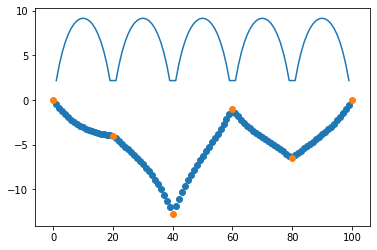

In [379]:
plt.scatter(unknown_indexes,esp_cond)
plt.scatter(observation_indexes,depth)
plt.plot(unknown_indexes,L)

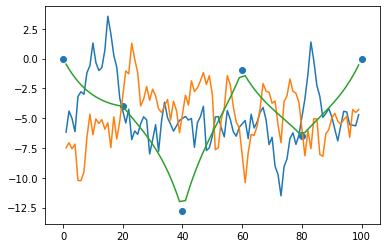

In [387]:
L = np.linalg.cholesky(cov_cond)
def simul( L ):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z
Z = simul(L)
plt.plot(unknown_indexes,Z)
plt.plot(unknown_indexes,Z1)

plt.plot(unknown_indexes, esp_cond)
plt.scatter(observation_indexes,depth)

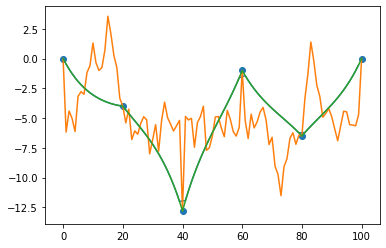

In [388]:
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth_ =list(depth)
    Z_ = list(Z)
    for i in range (N):

        if i in observation_indexes :
            prof.append(depth_.pop(0))
        else : 
            prof.append(Z_.pop(0))
    return prof
prof = builder(depth, observation_indexes,Z,N)

plt.plot(unknown_indexes, esp_cond)
plt.plot(prof)
plt.scatter(observation_indexes,depth)
plt.plot(builder(depth,observation_indexes,esp_cond,N))

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
    return S





In [401]:
def simul_N ( Number , Delta):
    length = []
    for i in range (Number):
        length.append(longueur(builder(depth,observation_indexes,simul(L),N),Delta))
    return np.mean(length)

simul_N(1,Delta)

534.5393868248206

In [396]:
L_th = longueur(builder(depth,observation_indexes,esp_cond,N),Delta)
L_th


501.6468416918411